In [2]:
import  numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from time import time
import librosa
from scipy.spatial.distance import cosine
from scipy.signal import find_peaks
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr

In [3]:
activity_codes_mapping = {'A': 'walking',
                          'D': 'sitting',
                          'S': 'standing',
                          'F': 'typing',
                          'J': 'laying',
                          'K': 'drinking',
                          'L':  'fetching',
                          'H': 'Housekeeping',
                          'R': 'Reading',
                          'P': 'Playing_phone',
                          'V': 'Video_games',
                          'C': 'Cooking',
                          'G': 'Grooming',
                          'E': 'Eating'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['S']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'red',
                      activity_codes_mapping['H']: 'blue',
                      activity_codes_mapping['R']: 'navy',
                      activity_codes_mapping['P']: 'darkcyan',
                      activity_codes_mapping['V']: 'goldenrod',
                      activity_codes_mapping['C']: 'violet',
                      activity_codes_mapping['G']: 'springgreen',
                      activity_codes_mapping['E']: 'chocolate'}

In [27]:
#1 use local walking accel data as training data
local_watch_accel_walking = pd.read_csv('watch_data/walking/walking/walking.csv', sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_walking.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_walking.columns = ['time', 'a_x', 'a_y', 'a_z' ,'AVx','AVy','AVz','x', 'y', 'z']
local_watch_accel_walking.insert(0, 'activity', 'A')

local_watch_accel_sitting = pd.read_csv('watch_data/sitting/sitting.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_sitting.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_sitting.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_sitting.insert(0, 'activity', 'D')

local_watch_accel_standing = pd.read_csv('watch_data/standing/standing.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])

local_watch_accel_standing.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_standing.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_standing.insert(0, 'activity', 'S')

local_watch_accel_typing = pd.read_csv('watch_data/typing/typing.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_typing.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_typing.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_typing.insert(0, 'activity', 'F')

local_watch_accel_laying = pd.read_csv('watch_data/laying/laying_ht.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_laying.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_laying.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_laying.insert(0, 'activity', 'J')

local_watch_accel_drinking= pd.read_csv('watch_data/drinking/drinking.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_drinking.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_drinking.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_drinking.insert(0, 'activity', 'K')

local_watch_accel_fetching = pd.read_csv('watch_data/fetching/fetching.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_fetching.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_fetching.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_fetching.insert(0, 'activity', 'L')

local_watch_accel_housekeeping= pd.read_csv('watch_data/cleaning/housekeeeping_dd.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_housekeeping.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_housekeeping.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_housekeeping.insert(0, 'activity', 'H')

local_watch_accel_reading= pd.read_csv('watch_data/reading/reading_dd3.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_reading.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_reading.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_reading.insert(0, 'activity', 'R')

local_watch_accel_playing_phone= pd.read_csv('watch_data/playing_phone/playing_phonedd.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_playing_phone.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_playing_phone.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_playing_phone.insert(0, 'activity', 'P')

local_watch_accel_Play_v= pd.read_csv('watch_data/playing_video/Play_v_dd.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_Play_v.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_Play_v.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_Play_v.insert(0, 'activity', 'V')

local_watch_accel_cooking= pd.read_csv('watch_data/cooking/cooking_2.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_cooking.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_cooking.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_cooking.insert(0, 'activity', 'C')

local_watch_accel_grooming= pd.read_csv('watch_data/grooming/grooming_dd.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_grooming.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_grooming.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_grooming.insert(0, 'activity', 'G')

local_watch_accel_eating= pd.read_csv('watch_data/eating/eating.csv' , sep=",", header=0, index_col=False ,names = ['time','sensor','accelx','accely','accelz','AVx','AVy','AVz','Ax','Ay','Az','temp'])
local_watch_accel_eating.drop(['sensor','temp'], axis = 1, inplace = True)
local_watch_accel_eating.columns = ['time', 'a_x', 'a_y', 'a_z','AVx','AVy','AVz', 'x', 'y', 'z']
local_watch_accel_eating.insert(0, 'activity', 'E')

data_accel_local_sum = pd.concat([local_watch_accel_walking, local_watch_accel_sitting, local_watch_accel_standing, local_watch_accel_typing, local_watch_accel_laying, local_watch_accel_drinking, local_watch_accel_fetching, local_watch_accel_housekeeping, local_watch_accel_reading, local_watch_accel_playing_phone, local_watch_accel_Play_v, local_watch_accel_cooking, local_watch_accel_grooming, local_watch_accel_eating], ignore_index=True)


In [28]:
#  define a function to compute all the features

def compute_features(window):
    features = {}
    for axis in ['a_x', 'a_y', 'a_z','AVx','AVy','AVz',  'x', 'y', 'z']:
        # Histogram features
        hist, bin_edges = np.histogram(window[axis], bins=10, density=True)
        bin_range = np.ptp(window[axis])
        bin_width = bin_range / 100
        features.update({f'{axis}{i}': count for i, count in enumerate(hist * bin_width)})

        # Average
        features[f'{axis}AVG'] = np.mean(window[axis])

        # Peak Time
        peaks, _ = find_peaks(window[axis])
        if len(peaks) > 1:
            peak_times = np.diff(peaks)
            features[f'{axis}PEAK'] = np.mean(peak_times)
        else:
            features[f'{axis}PEAK'] = 0  # No peaks or single peak

        # Absolute Deviation
        features[f'{axis}ABSOLDEV'] = np.mean(np.abs(window[axis] - features[f'{axis}AVG']))

        # Standard Deviation and Variance
        features[f'{axis}STANDDEV'] = np.std(window[axis])
        features[f'{axis}VAR'] = np.var(window[axis])

        # MFCCs
        mfccs = librosa.feature.mfcc(y=window[axis].values.astype(float), sr=100, n_mfcc=13)
        for i, mfcc in enumerate(mfccs):
            features[f'{axis}MFCC{i}'] = np.mean(mfcc)

    # Cosine distances and Correlations
    for pair in [('a_x', 'a_y'), ('a_x', 'a_z'), ('a_y', 'a_z')]:
        cos_distance = cosine(window[pair[0]], window[pair[1]])
        correlation, _ = pearsonr(window[pair[0]], window[pair[1]])
        features[f'{pair[0]}{pair[1]}COS'] = cos_distance
        features[f'{pair[0]}{pair[1]}COR'] = correlation

    # Resultant 1
    resultant1 = np.sqrt(window['a_x']**2 + window['a_y']**2 + window['a_z']**2)
    features['RESULTANT1'] = np.mean(resultant1)

    # Resultant 2
    resultant2 = np.sqrt(window['x']**2 + window['y']**2 + window['z']**2)
    features['RESULTANT2'] = np.mean(resultant2)
    
    # Resultant 3
    resultant3 = np.sqrt(window['AVx']**2 + window['AVy']**2 + window['AVz']**2)
    features['RESULTANT3'] = np.mean(resultant3)

    return features


label = []

def apply_to_windows(data, window_size=200):
    num_windows = len(data) // window_size  # Ensure full windows only
    all_features = []

    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        window = data.iloc[start:end]
        ######## change label
        activity = data_accel_local_sum['activity'][start:end]
        features = compute_features(window)
        all_features.append(features)
        activity = activity.value_counts().idxmax()
        label.append(activity)

    return pd.DataFrame(all_features)

# Apply the function to the data
features_df = apply_to_windows(data_accel_local_sum)

# Add the activity column
features_df['activity'] = label
# print(features_df)

# convert the activity column to numbers
cols = list(features_df.columns)

# move the last column (activity) to the front
cols = [cols[-1]] + cols[:-1]
features_df = features_df[cols]

# yy is the activity column(label), xx is the data without labels
yy = features_df['activity']
XX = features_df.drop('activity', axis=1)

print(features_df)

/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=200
  warnings.warn(
/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=200
  warnings.warn(
/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=200
  warnings.warn(
/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=200
  warnings.warn(
/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=200
  warnings.warn(
/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/librosa/core/spectrum.p

     activity    a_x0    a_x1    a_x2   a_x3    a_x4    a_x5   a_x6    a_x7  \
0           A  0.0005  0.0000  0.0000  0.000  0.0010  0.0140  0.029  0.0425   
1           A  0.0090  0.0115  0.0060  0.003  0.0070  0.0110  0.009  0.0165   
2           A  0.0040  0.0045  0.0160  0.012  0.0180  0.0100  0.009  0.0080   
3           A  0.0100  0.0170  0.0150  0.007  0.0060  0.0100  0.008  0.0130   
4           A  0.0120  0.0115  0.0150  0.012  0.0110  0.0170  0.005  0.0135   
...       ...     ...     ...     ...    ...     ...     ...    ...     ...   
3680        E  0.0020  0.0020  0.0115  0.009  0.0180  0.0105  0.017  0.0130   
3681        E  0.0005  0.0000  0.0000  0.000  0.0000  0.0000  0.000  0.0005   
3682        E  0.0090  0.0225  0.0190  0.016  0.0070  0.0140  0.007  0.0015   
3683        E  0.0005  0.0000  0.0000  0.000  0.0000  0.0000  0.007  0.0445   
3684        E  0.0040  0.0080  0.0220  0.019  0.0125  0.0120  0.008  0.0060   

        a_x8  ...   zMFCC12  a_xa_yCOS  a_xa_yCOR  

In [29]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(XX, yy, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = features_df.activity)

# scaling the data
scaling_transformer = MaxAbsScaler().fit(X_train[['a_xAVG', 'a_yAVG', 'a_zAVG', 'a_xPEAK', 'a_yPEAK', 'a_zPEAK', 'a_xABSOLDEV', 'a_yABSOLDEV', 'a_zABSOLDEV', 'xAVG', 'yAVG', 'zAVG', 'xPEAK', 'yPEAK', 'zPEAK', 'xABSOLDEV', 'yABSOLDEV', 'zABSOLDEV','AVxAVG', 'AVyAVG', 'AVzAVG', 'AVxPEAK', 'AVyPEAK', 'AVzPEAK', 'AVxABSOLDEV', 'AVyABSOLDEV', 'AVzABSOLDEV','RESULTANT3','RESULTANT1','RESULTANT2']])
X_train[['a_xAVG', 'a_yAVG', 'a_zAVG', 'a_xPEAK', 'a_yPEAK', 'a_zPEAK', 'a_xABSOLDEV', 'a_yABSOLDEV', 'a_zABSOLDEV', 'xAVG', 'yAVG', 'zAVG', 'xPEAK', 'yPEAK', 'zPEAK', 'xABSOLDEV', 'yABSOLDEV', 'zABSOLDEV','AVxAVG', 'AVyAVG', 'AVzAVG', 'AVxPEAK', 'AVyPEAK', 'AVzPEAK', 'AVxABSOLDEV', 'AVyABSOLDEV', 'AVzABSOLDEV','RESULTANT3','RESULTANT1','RESULTANT2']] = scaling_transformer.transform(X_train[['a_xAVG', 'a_yAVG', 'a_zAVG', 'a_xPEAK', 'a_yPEAK', 'a_zPEAK', 'a_xABSOLDEV', 'a_yABSOLDEV', 'a_zABSOLDEV', 'xAVG', 'yAVG', 'zAVG', 'xPEAK', 'yPEAK', 'zPEAK', 'xABSOLDEV', 'yABSOLDEV', 'zABSOLDEV','AVxAVG', 'AVyAVG', 'AVzAVG', 'AVxPEAK', 'AVyPEAK', 'AVzPEAK', 'AVxABSOLDEV', 'AVyABSOLDEV', 'AVzABSOLDEV','RESULTANT3','RESULTANT1','RESULTANT2']])
X_test = X_test.copy()
X_test[['a_xAVG', 'a_yAVG', 'a_zAVG', 'a_xPEAK', 'a_yPEAK', 'a_zPEAK', 'a_xABSOLDEV', 'a_yABSOLDEV', 'a_zABSOLDEV', 'xAVG', 'yAVG', 'zAVG', 'xPEAK', 'yPEAK', 'zPEAK', 'xABSOLDEV', 'yABSOLDEV', 'zABSOLDEV','AVxAVG', 'AVyAVG', 'AVzAVG', 'AVxPEAK', 'AVyPEAK', 'AVzPEAK', 'AVxABSOLDEV', 'AVyABSOLDEV', 'AVzABSOLDEV','RESULTANT3','RESULTANT1','RESULTANT2']] = scaling_transformer.transform(X_test[['a_xAVG', 'a_yAVG', 'a_zAVG', 'a_xPEAK', 'a_yPEAK', 'a_zPEAK', 'a_xABSOLDEV', 'a_yABSOLDEV', 'a_zABSOLDEV', 'xAVG', 'yAVG', 'zAVG', 'xPEAK', 'yPEAK', 'zPEAK', 'xABSOLDEV', 'yABSOLDEV', 'zABSOLDEV','AVxAVG', 'AVyAVG', 'AVzAVG', 'AVxPEAK', 'AVyPEAK', 'AVzPEAK', 'AVxABSOLDEV', 'AVyABSOLDEV', 'AVzABSOLDEV','RESULTANT3','RESULTANT1','RESULTANT2']])
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)  

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Iteration 1, loss = 2.58752947
Iteration 2, loss = 1.85990582
Iteration 3, loss = 1.34999908
Iteration 4, loss = 0.96609895
Iteration 5, loss = 0.67137932
Iteration 6, loss = 0.47385544
Iteration 7, loss = 0.34616205
Iteration 8, loss = 0.26311637
Iteration 9, loss = 0.20727461
Iteration 10, loss = 0.16650576
Iteration 11, loss = 0.13526401
Iteration 12, loss = 0.11229719
Iteration 13, loss = 0.09379423
Iteration 14, loss = 0.07972209
Iteration 15, loss = 0.06821849
Iteration 16, loss = 0.05876041
Iteration 17, loss = 0.05126202
Iteration 18, loss = 0.04507273
Iteration 19, loss = 0.03927454
Iteration 20, loss = 0.03456707
Iteration 21, loss = 0.03052709
Iteration 22, loss = 0.02706504
Iteration 23, loss = 0.02406314
Iteration 24, loss = 0.02147199
Iteration 25, loss = 0.01920414
Iteration 26, loss = 0.01724835
Iteration 27, loss = 0.01547430
Iteration 28, loss = 0.01409870
Iteration 29, loss = 0.01280551
Iteration 30, loss = 0.01165471
Iteration 31, loss = 0.01066271
Iteration 32, los

/Users/zehaokou/miniconda3/envs/llama/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


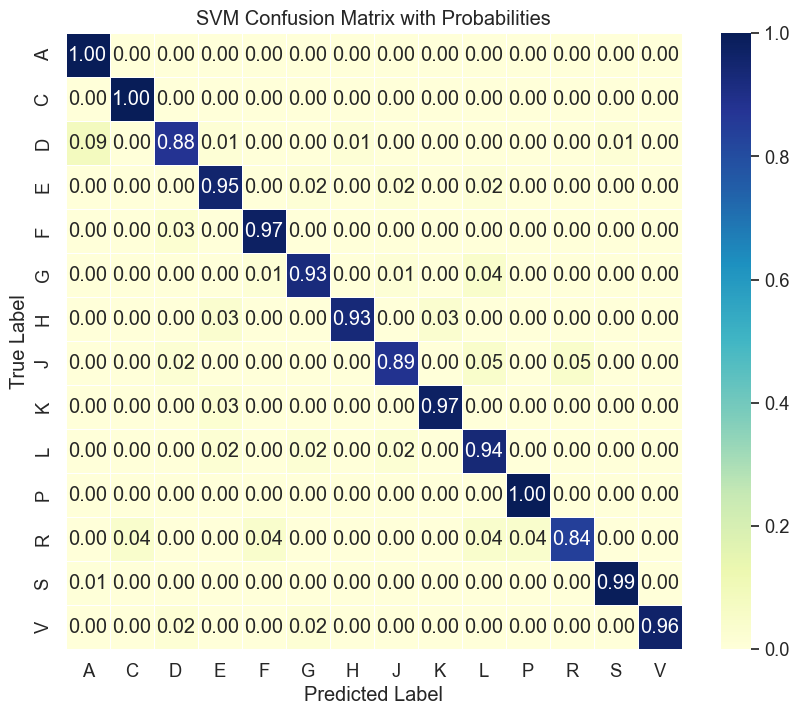

Classification Report:
               precision    recall  f1-score   support

           A       0.96      1.00      0.98       174
           C       0.98      1.00      0.99        45
           D       0.96      0.88      0.92        82
           E       0.94      0.95      0.95        66
           F       0.95      0.97      0.96        38
           G       0.95      0.93      0.94        67
           H       0.96      0.93      0.95        29
           J       0.93      0.89      0.91        44
           K       0.97      0.97      0.97        38
           L       0.86      0.94      0.90        47
           P       0.98      1.00      0.99        43
           R       0.91      0.84      0.87        25
           S       0.99      0.99      0.99       168
           V       1.00      0.96      0.98        56

    accuracy                           0.96       922
   macro avg       0.95      0.95      0.95       922
weighted avg       0.96      0.96      0.96       922

A

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler

mlp = MLPClassifier(hidden_layer_sizes = (50,30), max_iter = 900 , alpha= 0.000001,
                    solver = 'adam', verbose = 10, random_state = 21, tol = 0.000000001 )

mlp.fit(X_train_scaled , y_train)
y_pred = mlp.predict(X_test_scaled)

# 生成混淆矩阵并进行归一化
cm = confusion_matrix(y_test, y_pred, normalize='true')

# 将混淆矩阵转换为 DataFrame 以便可视化
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# 绘制热力图，显示归一化后的概率
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=.5, square=True)
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('True Label')
heatmap.set_title('SVM Confusion Matrix with Probabilities')
plt.savefig('watch_mlp.svg', format='svg')
plt.show()

# 打印分类报告
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# 打印准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)